## 3.5. Gradient Boosting

---

In [1]:
import sys
sys.path.insert(1, '../../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split

dataTrain: pd.DataFrame = pd.read_csv('data/prepared/data.csv', sep=';')
dataTest: pd.DataFrame = pd.read_csv('data/prepared_test/data.csv', sep=';')

<Figure size 600x450 with 0 Axes>

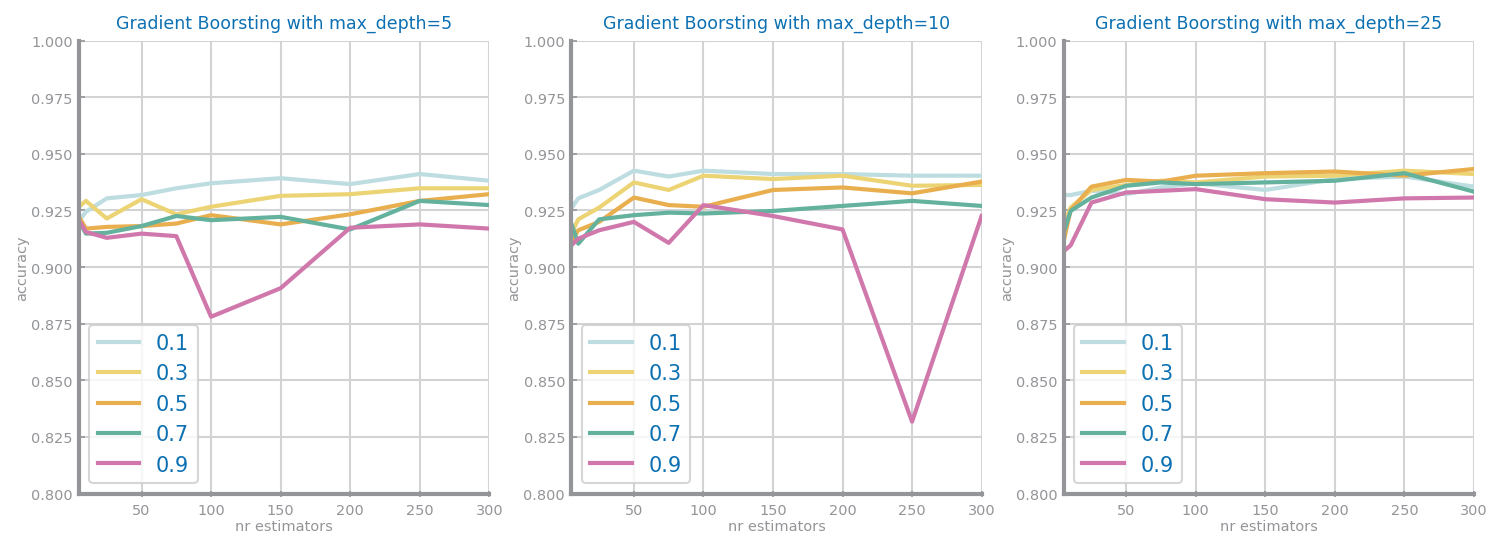

Best results with depth=25, learning rate=0.50 and 300 estimators, with accuracy=0.943


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
import ds_functions as ds

trnY: np.ndarray = dataTrain.pop('exp').values
trnX: np.ndarray = dataTrain.values
tstY: np.ndarray = dataTest.pop('exp').values
tstX: np.ndarray = dataTest.values
    
labels = pd.unique(trnY)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25]
learning_rate = [.1, .3, .5, .7, .9]
best = ('', 0, 0)
last_best = 0
best_tree = None

cols = len(max_depths)
plt.figure()
fig, axs = plt.subplots(1, cols, figsize=(cols*ds.HEIGHT, ds.HEIGHT), squeeze=False)
for k in range(len(max_depths)):
    d = max_depths[k]
    values = {}
    for lr in learning_rate:
        yvalues = []
        for n in n_estimators:
            gb = GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=lr)
            gb.fit(trnX, trnY)
            prdY = gb.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (d, lr, n)
                last_best = yvalues[-1]
                best_tree = gb
        values[lr] = yvalues
    ds.multiple_line_chart(n_estimators, values, ax=axs[0, k], title='Gradient Boorsting with max_depth=%d'%d,
                           xlabel='nr estimators', ylabel='accuracy', percentage=True, yrange=(0.8, 1))

plt.show()
print('Best results with depth=%d, learning rate=%1.2f and %d estimators, with accuracy=%1.3f'%(best[0], best[1], best[2], last_best))

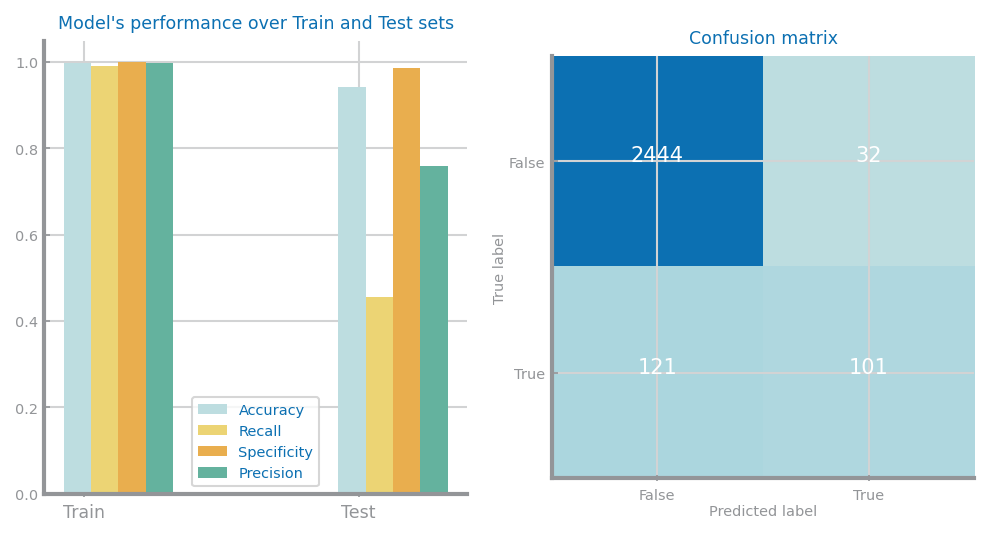

In [3]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst, showXTickLabels = True)

<Figure size 600x450 with 0 Axes>

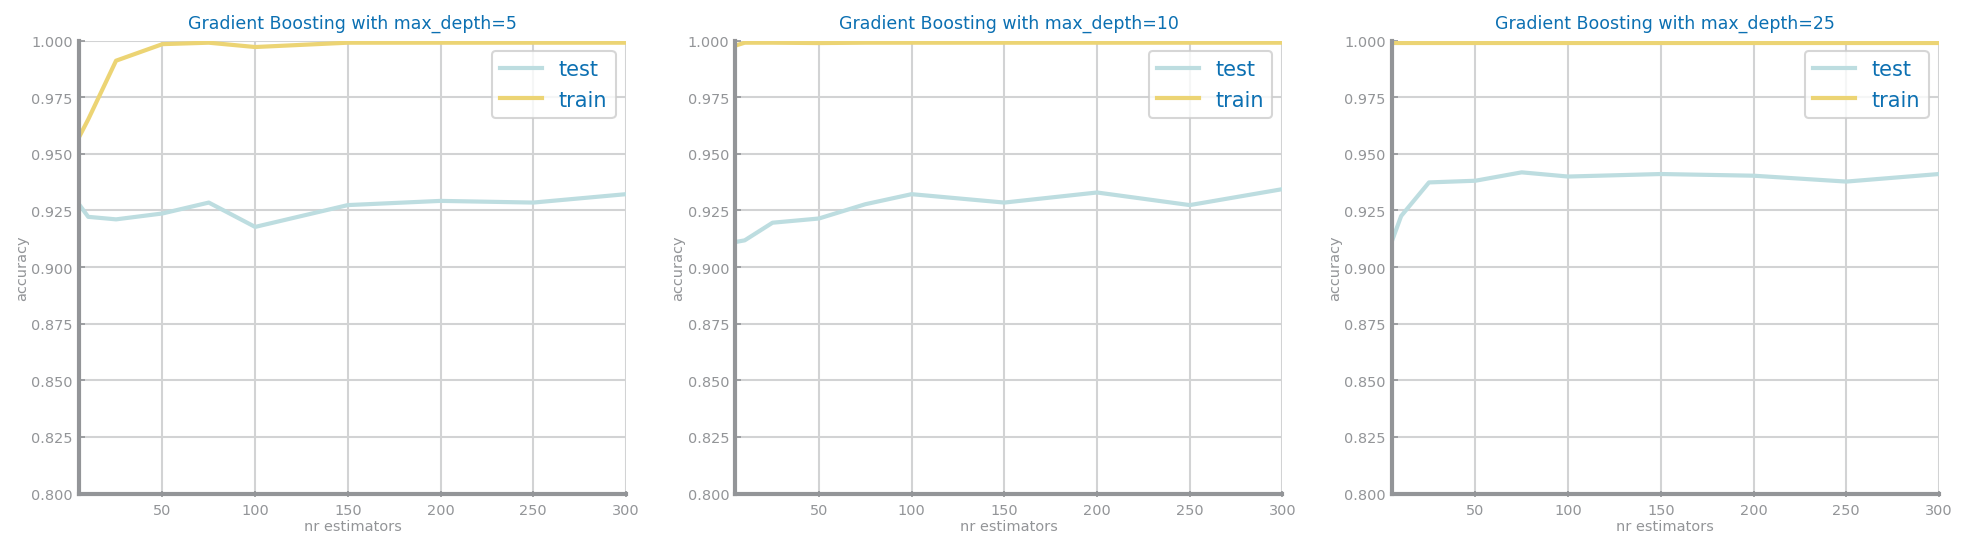

Best results achieved with max_depth=25, learning_rate=0 and nr_estimators=300.000000 ==> accuracy=0.943291


In [5]:
learning_rate = [best[1]]

plt.figure()
fig, axs = plt.subplots(1, len(max_depths), figsize=(16, 4), squeeze=False)
for k in range(len(max_depths)):
    d = max_depths[k]
    values = {}
    for lr in learning_rate:
        yvalues = []
        yvalues_train = []
        for n in n_estimators:
            gb = GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=lr)
            gb.fit(trnX, trnY)
            prdY = gb.predict(tstX)
            prdY_train = gb.predict(trnX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            yvalues_train.append(metrics.accuracy_score(trnY, prdY_train))
        values['test'] = yvalues
        values['train'] = yvalues_train
    ds.multiple_line_chart(n_estimators, values, ax=axs[0, k], title='Gradient Boosting with max_depth=%d'%d,
                           xlabel='nr estimators', ylabel='accuracy', percentage=True, yrange=(0.8, 1))

plt.show()
print('Best results achieved with max_depth=%d, learning_rate=%.1f and nr_estimators=%d ==> accuracy=%f'%(best[0], best[1], best[2], last_best))

In [6]:
print('Ignore previous print!\n')
print('Best results achieved with max_depth=%d, learning_rate=%.1f and nr_estimators=%d ==> accuracy=%f'%(best[0], best[1], best[2], last_best))

Ignore previous print!

Best results achieved with max_depth=25, learning_rate=0.5 and nr_estimators=300 ==> accuracy=0.943291


### Summary

---

***How does performance changes with the number of estimators?***


***How does performance changes of learning rate?***


***How do models improve with the increase of max_depth?***


***What is the best parametrisation (max_depth, number of estimators and learning rate)?***


***Is the accuracy achieved good enough?***


***What is the largest kind of errors?***


***Is it possible to identify overfitting?***